# Classification

## Binary Classification

Let $x^{(i)}\in X^d, 1\leq i\leq N$ be a sequence of M data points. Each having d characteristic features $x^{(i)}=(x^{(i)}_1, x^{(i)}_2, \ldots, x^{(i)}_d)$ and the task is to assign to each element $x^{(i)}$ a label $y^{(i)} \in \{-1,+1\}$. We want to divide the data points into two classes labeled -1 and +1.

Given some pre-labeled training data: $(x^{(i)},y^{(i)})_{1\leq i\leq M}, M< N$, we want to learn a classifier $h: X^d \to \{-1,+1\}$, that maps each point in $X^d$ to its label $\{-1,+1\}$.

In [1]:
from sklearn.datasets import load_iris
data = load_iris()
X, y, features, labels = data.data, data.target, list(data.feature_names), data.target_names
print(X.shape, y.shape, features, list(labels))

(150, 4) (150,) ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa', 'versicolor', 'virginica']


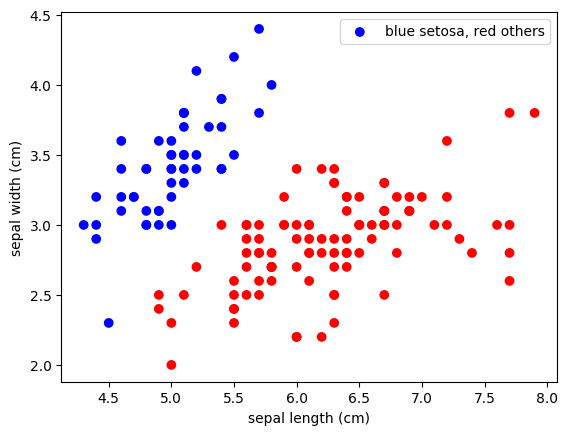

In [2]:
import matplotlib.pyplot as plt
c = ["b" if y[i] == 0 else "r" for i in range(y.shape[0])]
fig, ax = plt.subplots()
ax.scatter(X[:,0],X[:,1], c=c)
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.legend(["blue setosa, red others"])
plt.show()

## Linear Separability

Two sets $X_1 \in R^n$ und $X_2 \in R^n$ are linear separable, if there are n $w_i \in R, i=1, ...n$ and one $k \in R$, so that:

$$ \forall x^{(1)} \in X_1, \sum_{i=1}^{n} w_i * x^{(1)}_i < k,  \space and \space \forall x^{(2)} \in X_2, \sum_{i=1}^{n} w_i * x^{(2)}_i > k$$



Geometrically, this means that we can construct a hyperplane separating the two sets of data.

## The Geometry of a Hyperplane

A hyperplane is a set of points that can be expressed by an inner product equation:

$$ H = \{x \in R^n: w^T*x +b = 0\},$$ 

with  $w \in R^n$ und $b \in R$.


Let $x_0 \in H$. Then for all $x \in H$:

$$ w^T*x + b = 0 = w^T*x_0 + b$$
$$  w^T*x + b  - (w^T*x_0 + b) = 0 $$
$$  w^T*x - w^T*x_0 = 0 $$
$$  w^T*(x - x_0) = 0 $$

A hyperplane is the set of vectors  $x - x_0$ othogonal to $w$.

see: https://inst.eecs.berkeley.edu/~ee127/sp21/livebook/l_vecs_hyp.html

## Examples
Use the data utilities from scikit-learn to construct linear separable and non-separable sets: 

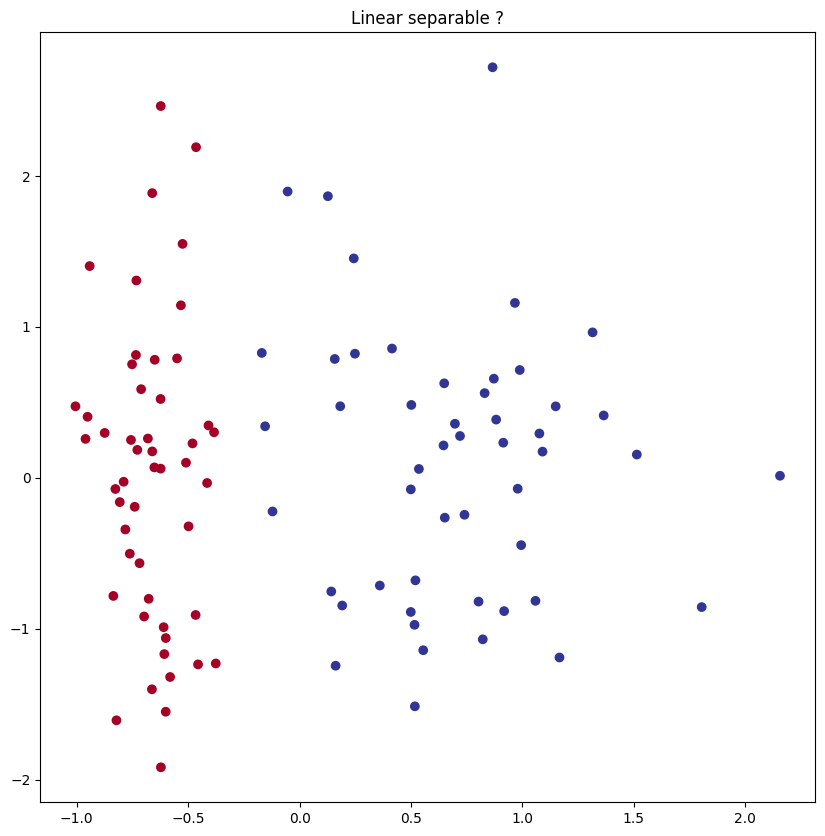

In [4]:
from sklearn.datasets import make_classification

"""
There are some rules
(1) Number of informative, redundant and repeated features must sum to less than the number of total features.
(2) n_classes * n_clusters_per_class must be smaller or equal 2**n_informative
"""
separability = 0.7
X0, y0 = make_classification(n_samples=100, 
                           n_features=2, n_informative=1, n_redundant=0, 
                           n_repeated=0, 
                           n_classes=2, n_clusters_per_class=1, 
                           weights=None, flip_y=0.01, 
                           class_sep=separability, hypercube=True, 
                           shift=0.0, scale=1.0, shuffle=True, 
                           random_state=42)

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(X0[:,0], X0[:,1],c=y0, cmap="RdYlBu")
ax.set_title("Linear separable ?")
plt.show()

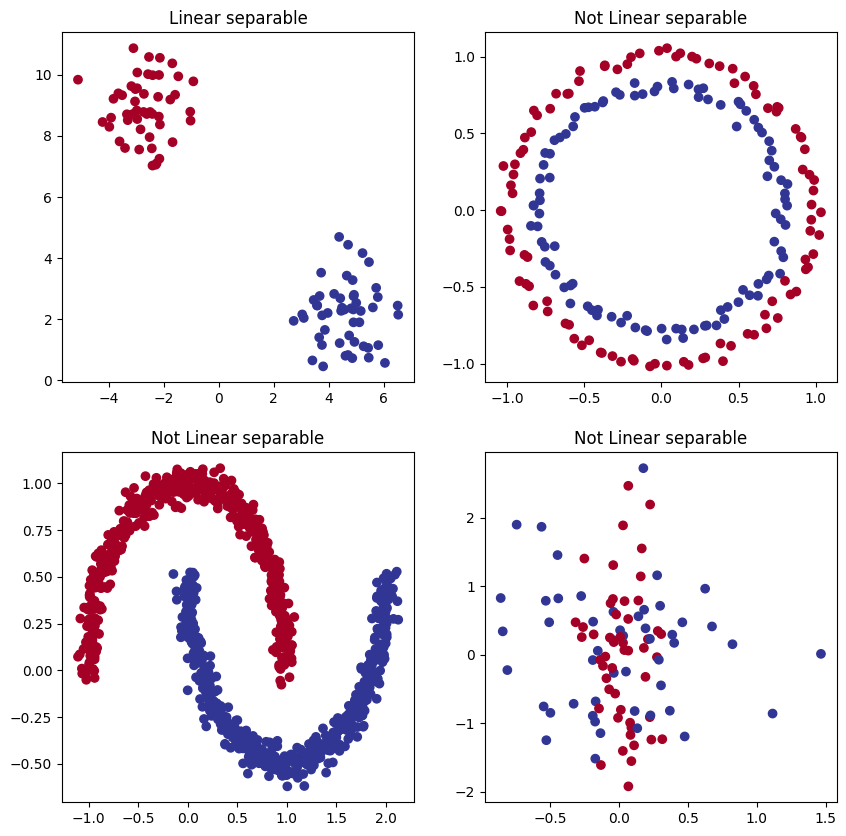

In [5]:
from sklearn.datasets import make_blobs, make_circles, make_moons, make_hastie_10_2

X3, y3 = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.0, center_box=(-10.0, 10.0), 
                  shuffle=True, random_state=42, return_centers=False)

X4, y4 = make_circles(n_samples=200, shuffle=True, noise=0.03, random_state=42, factor=0.8)

X5, y5 = make_moons(n_samples=1000, shuffle=True, noise=0.05, random_state=42)

separability = 0.01
X6, y6 = make_classification(n_samples=100, 
                           n_features=2, n_informative=1, n_redundant=0, 
                           n_repeated=0, 
                           n_classes=2, n_clusters_per_class=1, 
                           weights=None, flip_y=0.01, 
                           class_sep=separability, hypercube=True, 
                           shift=0.0, scale=1.0, shuffle=True, 
                           random_state=42)


fig, ax = plt.subplots(2,2, figsize=(10,10))
ax[0,0].scatter(X3[:,0], X3[:,1], c=y3, cmap="RdYlBu")
ax[0,0].set_title("Linear separable")
ax[0,1].scatter(X4[:,0], X4[:,1], c=y4, cmap="RdYlBu")
ax[0,1].set_title("Not Linear separable")
ax[1,0].scatter(X5[:,0], X5[:,1], c=y5, cmap="RdYlBu")
ax[1,0].set_title("Not Linear separable")
ax[1,1].scatter(X6[:,0], X6[:,1], c=y6, cmap="RdYlBu")
ax[1,1].set_title("Not Linear separable")


plt.show()

## Further Reading

There are several methods to find whether the data is linearly separable, some of them are highlighted in this paper (1). With assumption of two classes in the dataset, following are few methods to find whether they are linearly separable:

- Linear programming: Defines an objective function subjected to constraints that satisfy linear separability. You can find detail about implementation here.
- Perceptron method: A perceptron is guaranteed to converge if the data is linearly separable.
- Quadratic programming: Quadratic programming optimisation objective function can be defined with constraint as in SVM.
- Computational geometry: If one can find two disjoint convex hulls then the data is linearly separable
Clustering method: If one can find two clusters with cluster purity of 100% using some clustering methods such as k-means, then the data is linearly separable.

(1): Elizondo, D., "The linear separability problem: some testing methods," in Neural Networks, IEEE Transactions on , vol.17, no.2, pp.330-344, March 2006 doi: 10.1109/TNN.2005.860871